In [93]:
# latihan decision tree dengan datasets iris
import sklearn.datasets as datasets
import pandas as pd

# kita membaca file iris
iris = pd.read_csv('dataset/iris.csv') 
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [33]:
# menghilangkan kolom Id
# iris.drop('Id', axis=1)

# pemisahan atribut dan label untuk pelatihan model
# atribut 
x = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
# x
# label
y = iris['Species']
# y


In [44]:
from sklearn.tree import DecisionTreeClassifier

# inisialisasi model DecisionTreeClssifier
clf = DecisionTreeClassifier()

# melakukan pelatihn model terhadap data
clf.fit(x,y)

# melakukn prediksi dengan model(clf).tree_predict([[panjang sepal, lebar sepal, panjang petal, lebar petal]])
clf.predict([[6,2.2,4.5,1]])


array(['Iris-versicolor'], dtype=object)

In [43]:
# meng export menjadi sebuah graphic
from sklearn.tree import export_graphviz

export_graphviz(
    clf,
    out_file = 'iris_graphic.dot',
    feature_names= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],
    class_names= ['Iris-setosa', 'Iris-virginica','Iris-versicolor'],
    rounded=True,
    filled= True,
)



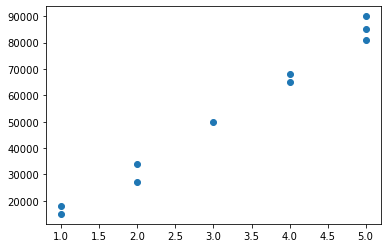

In [48]:
# Reggresion supervised
# Linear Regresion

import numpy as np

# data jumlah kamaar
kamar = np.array([1,1,2,2,3,4,4,5,5,5])

# harga perkamar dalam dollar
price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

# menampilkan skatter plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(kamar,price)



In [59]:
# melatih data dengan model linear regression
from sklearn.linear_model import LinearRegression

# latih model dengan LinearRegresion.fit()
kamar = kamar.reshape(-1,1)
linearRegresion = LinearRegression()
linearRegresion.fit(kamar,price)



LinearRegression()

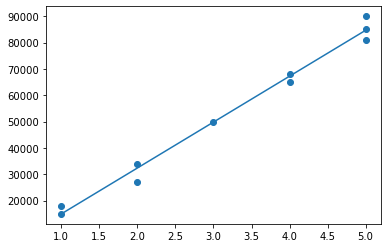

In [61]:
# menampilkan plot hubungan antara jumlah kamar dengan harga

plt.scatter(kamar,price)
plt.plot(kamar,linearRegresion.predict(kamar))


In [95]:
# Logistic Regresion
import pandas as pd

# membaca dataset menjadi dataframe
dataAds = pd.read_csv('dataset/Social_Network_Ads.csv')

# menghilangkan kolom User ID
dataAds = dataAds.drop('User ID',axis=1)

# melakukan oneHots endcoding
dataAds = pd.get_dummies(dataAds)
dataAds


,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [79]:
# memisahkan data atribut dan label
prediction = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']

x = dataAds[prediction]
y = dataAds['Purchased']

# lakukan proses normalisasi pada data
from sklearn.preprocessing import StandardScaler

# init scaller
scaler = StandardScaler()
# melakukan normalisasi
scaled_data = scaler.fit_transform(x)
# memasukan data kembali pada colom
scaled_data = pd.DataFrame(scaled_data, columns=x.columns)
scaled_data.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [91]:
# melakukan train_set_split

from sklearn.model_selection import train_test_split

# membagi menjadi train dan test untuk setiap atribut
x_train, x_test, y_train, y_test = train_test_split(scaled_data,y, test_size = 0.2, random_state=0)

# melatih model dengan train set dengan fungsifit
from sklearn import linear_model

# melatih model
model = linear_model.LogisticRegression()
# melatih model dengan fungsi fit
model.fit(x_train,y_train)
# melihat score
model.score(x_test,y_test)


0.9125